In [206]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [207]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlite3


# Reflect Tables into SQLAlchemy ORM

In [208]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta
from sqlalchemy import Column, Date


In [209]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [210]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [211]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [212]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [213]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [214]:
# Find the most recent date in the data set.
measurement_df = pd.read_csv('Resources/hawaii_measurements.csv')
measurement_df.sort_values(by='date', ascending=False, inplace=True)
most_recent_date = measurement_df['date'].iloc[0]
print(most_recent_date)


2017-08-23


In [215]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve_months = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months_results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
                    
last_twelve_months_results

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [216]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(year_ago)

2016-08-23


In [217]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago, Measurement.prcp != None).\
    order_by(Measurement.date).all()
precip_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [218]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data_df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])
precip_data_df['date'] = pd.to_datetime(precip_data_df['date'])

precip_data_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79
...,...,...
2016,2017-08-22,0.50
2017,2017-08-23,0.00
2018,2017-08-23,0.00
2019,2017-08-23,0.08


In [219]:
# Sort the dataframe by date
sorted_df = precip_data_df.sort_values(by='date', inplace=False)
print(sorted_df)



           date  precipitation
0    2016-08-23           0.00
1    2016-08-23           0.15
2    2016-08-23           0.05
3    2016-08-23           0.02
4    2016-08-23           1.79
...         ...            ...
2014 2017-08-22           0.00
2018 2017-08-23           0.00
2019 2017-08-23           0.08
2017 2017-08-23           0.00
2020 2017-08-23           0.45

[2021 rows x 2 columns]


In [220]:
# Use Pandas Plotting with Matplotlib to plot the data
mean_precipitation = sorted_df['precipitation'].mean()
sorted_df['date'] = pd.to_datetime(sorted_df['date'])
mean_precipitation

0.17727857496288965

In [221]:
filtered_df = sorted_df[(sorted_df['precipitation'] >= mean_precipitation - 6) & (sorted_df['precipitation'] <= mean_precipitation + 6)]
                        
                        
print(filtered_df)
                        

           date  precipitation
0    2016-08-23           0.00
1    2016-08-23           0.15
2    2016-08-23           0.05
3    2016-08-23           0.02
4    2016-08-23           1.79
...         ...            ...
2014 2017-08-22           0.00
2018 2017-08-23           0.00
2019 2017-08-23           0.08
2017 2017-08-23           0.00
2020 2017-08-23           0.45

[2019 rows x 2 columns]


In [222]:
monthly_avg_precipitation = filtered_df.groupby(filtered_df['date'].dt.month)['precipitation'].mean()
monthly_avg_precipitation

date
1     0.070294
2     0.241111
3     0.175266
4     0.286235
5     0.151317
6     0.120000
7     0.134773
8     0.193955
9     0.248256
10    0.121620
11    0.120234
12    0.199494
Name: precipitation, dtype: float64

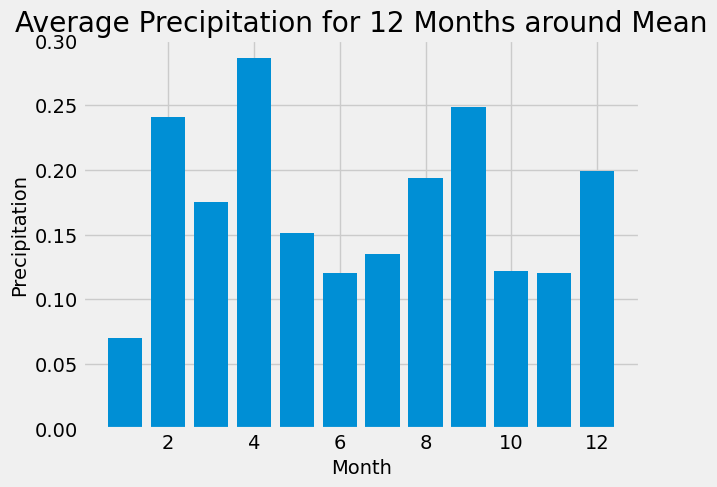

In [223]:
plt.bar(monthly_avg_precipitation.index, monthly_avg_precipitation.values)
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.title('Average Precipitation for 12 Months around Mean')
plt.show()

In [224]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = sorted_df['precipitation'].describe()
summary_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [225]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()


9

In [226]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [227]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
station_stats

[(54.0, 85.0, 71.66378066378067)]

In [228]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_twelve_months_temp = session.query(Measurement.tobs).\
      filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()

last_twelve_months_temp_df = pd.DataFrame(last_twelve_months_temp, columns=['tobs'])
      
last_twelve_months_temp_df      

,tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0
...,...
347,81.0
348,82.0
349,82.0
350,82.0


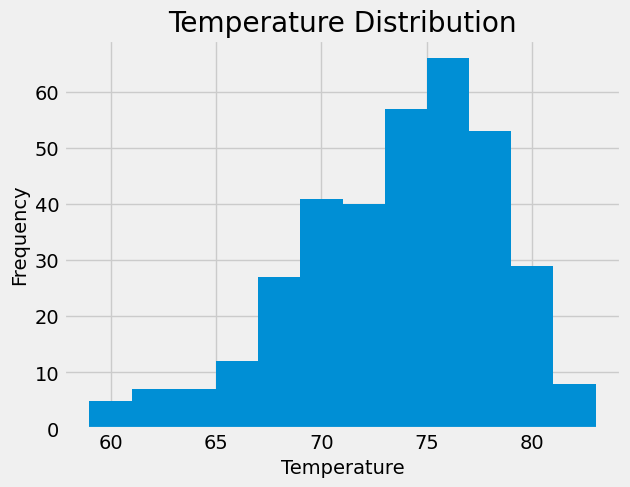

In [229]:
plt.hist(last_twelve_months_temp_df, bins=12) 
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()



# Close Session

In [230]:
# Close Session
session.close()